# Visualization of Information from Raw Twitter Data

The objective of this Python notebook is to extract all the possible information from raw Twitter data collected using the Twitter Streaming API.

In [1]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [2]:
#Reading the raw data collected from the Twitter Streaming API using Tweepy. 
tweets_data = []
tweets_data_path = 'ENTER FILEPATH TO .txt FILE HERE'
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [3]:
#Error codes from the Twitter API can be inside the .txt document, take them off
tweets_data = [x for x in tweets_data if not isinstance(x, int)]

In [4]:
print("The total number of Tweets is:",len(tweets_data))

The total number of Tweets is: 133030


First, we will make some functions to map the fields of the Tweet JSON to a dataframe

In [6]:
#Create function for taking the most used Tweet sources off the source column 
def reckondevice(tweet):
    if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
        return 'iPhone'
    elif 'Android' in tweet['source']:
        return 'Android'
    elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
        return 'Mobile device'
    elif 'Mac' in tweet['source']:
        return 'Mac'
    elif 'Windows' in tweet['source']:
        return 'Windows'
    elif 'Bot' in tweet['source']:
        return 'Bot'
    elif 'Web' in tweet['source']:
        return 'Web'
    elif 'Instagram' in tweet['source']:
        return 'Instagram'
    elif 'Blackberry' in tweet['source']:
        return 'Blackberry'
    elif 'iPad' in tweet['source']:
        return 'iPad'
    elif 'Foursquare' in tweet['source']:
        return 'Foursquare'
    else:
        return '-'   

In [7]:
#Create a function to see if the tweet is a retweet
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

In [8]:
#Create a function to see if the tweet is a reply to a tweet of another user, if so return said user. 
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [9]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the desired fields from the JSON. More could be added if needed.
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data))
tweets['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['device'] = list(map(reckondevice, tweets_data))
tweets['RT'] = list(map(is_RT, tweets_data))
tweets['Reply'] = list(map(is_Reply_to, tweets_data))

In [10]:
tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply
0,RT @rocciabella: First stockpile in.\n#peoples...,Union_Jacky,Mon Feb 25 11:44:48 +0000 2019,87,None,iPhone,True,None
1,RT @Dentons: Our #UK #RealEstate team discusse...,MKRealEstLaw,Mon Feb 25 11:44:48 +0000 2019,140,London,Web,True,None
2,RT @SimonOak3: @owenhalliday123 @JohnHopkins_ ...,preshn9,Mon Feb 25 11:44:53 +0000 2019,140,None,Android,True,None
3,RT @johnmcdonnellMP: This report by Class conf...,MomentumCV,Mon Feb 25 11:44:54 +0000 2019,140,"Council Estate, HD2, Kirklees,",Android,True,None
4,RT @M_AndersonSF: Cllr. Patricia Logue and I a...,half98,Mon Feb 25 11:44:55 +0000 2019,140,Belfast,Android,True,None


In [11]:
pd.set_option('display.max_colwidth', -1)

In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133030 entries, 0 to 133029
Data columns (total 8 columns):
text         133030 non-null object
Username     133030 non-null object
Timestamp    133030 non-null object
lenght       133030 non-null int64
location     97039 non-null object
device       133030 non-null object
RT           133030 non-null bool
Reply        8948 non-null object
dtypes: bool(1), int64(1), object(6)
memory usage: 7.2+ MB


In [13]:
#See the percentage of tweets from the initial set that are retweets:
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 73% of all the tweets


In [14]:
RT_tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply
0,RT @rocciabella: First stockpile in.\n#peoplesvote #FBPE #Brexit https://t.co/lsJEe5YJNN,Union_Jacky,Mon Feb 25 11:44:48 +0000 2019,87,None,iPhone,True,None
1,RT @Dentons: Our #UK #RealEstate team discusses a recent High Court decision in Canary Wharf Limited v. European Medicines Agency confirmin…,MKRealEstLaw,Mon Feb 25 11:44:48 +0000 2019,140,London,Web,True,None
2,RT @SimonOak3: @owenhalliday123 @JohnHopkins_ Outraged if this criminal madness would not be stopped right now.\n\n#Brexit is a crime.\n\n#Stop…,preshn9,Mon Feb 25 11:44:53 +0000 2019,140,None,Android,True,None
3,RT @johnmcdonnellMP: This report by Class confirms forensically what so many are reporting is the reality on the ground in their communitie…,MomentumCV,Mon Feb 25 11:44:54 +0000 2019,140,"Council Estate, HD2, Kirklees,",Android,True,None
4,RT @M_AndersonSF: Cllr. Patricia Logue and I are just out of a brilliant meeting with the residents in Alexander house.\nDiscussion on #Brex…,half98,Mon Feb 25 11:44:55 +0000 2019,140,Belfast,Android,True,None


In [15]:
#See the percentage of tweets from the initial set that are replies to tweets of another user:
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of retweets is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 7% of all the tweets


In [16]:
Reply_tweets.tail()

,text,Username,Timestamp,lenght,location,device,RT,Reply
132976,"@Think_Become @jeremycorbyn Unfortunately, if #Brexit goes ahead, there will be even less money to spend on important public services such as this. :-/",rotortorture,Fri Mar 01 08:28:15 +0000 2019,151,None,iPhone,False,Think_Become
132978,@Jacob_Rees_Mogg Heavily discounted prices? #Brexit dividends for foreigners?,sally_ericsson,Fri Mar 01 08:28:16 +0000 2019,77,"London, England",iPhone,False,Jacob_Rees_Mogg
132988,@DominicRaab what a breath of fresh air a politician That is actually saying it as it is. Thoroughly enjoyed the interview on @BBCRadio4 #brexit #talksense #getonwithbrexit,JoanneTaylor20,Fri Mar 01 08:28:22 +0000 2019,172,Meden Vale,iPhone,False,DominicRaab
132993,@Nigel_Farage If you are sure you have a majority backing for brexit #peoplesvote save the shoe leather !!!,alter_f,Fri Mar 01 08:28:23 +0000 2019,107,None,iPhone,False,Nigel_Farage
133001,@theresa_may mps get a £2000 pay increase this week. Last week they cut the fire brigade salary then covered it up with the isis lassie. Lol oh what a time to be alive. #crooksinsuits #Brexit,Lookup78049029,Fri Mar 01 08:28:27 +0000 2019,195,"Scotland, United Kingdom",Android,False,theresa_may


In [17]:
#See the percentage of tweets from the initial set that have mentions and are not retweets:
mention_tweets = tweets[~tweets['text'].str.contains("RT")  & tweets['text'].str.contains("@")]
print(f"The percentage of retweets is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 11% of all the tweets


In [18]:
mention_tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply
16,Theresa May and @JunckerEU 'took stock of the work done over the last few days' on #Brexit talks and agreed 'good progress is being made' at their meeting in Sharm El-Sheikh - EU Commission spokeswoman just now,David_Churchill,Mon Feb 25 11:45:08 +0000 2019,210,"Brussels, Belgium",Web,False,None
21,"I commend this to @TheIndGroup ( incl. @ChukaUmunna and @Anna_Soubry), who, thus far, I also commend ... for there is at present another “certain good and great purpose”, which is stopping the great act of national self-harm as currently pursued, of #Brexit https://t.co/SsQtI2uSbz",aglawton52,Mon Feb 25 11:45:13 +0000 2019,281,"Church Langton, Europe",Mobile device,False,None
24,"Totally, there is no acceptable outcome other than a full &amp; comprehensive #Brexit\n\nTo botch that would be to destroy the party in the eyes of the electorate &amp; put clown Corbyn in No10 (purely down to Tory voters staying away from polling booths in disgust)!\n\n@ConservativeCCh",MarkGriffin59,Mon Feb 25 11:45:16 +0000 2019,283,London UK,Android,False,None
28,"'Our working assumption remains that the UK is leaving on the 29th of March', says @EU_Commission spox on #brexit. Nice use of the verb 'remain'.",trouwschmidt,Mon Feb 25 11:45:21 +0000 2019,145,Amsterdam / Brussels,Web,False,None
35,"DEMOCRACY DENIER. SANCTIMONIOUS @Tobias_Ellwood whines how much terrible damage NO DEAL will do, without explaining why, after lengthy debate, he VOTED FOR IT. Has some explaining to do eh? https://t.co/r35BDs70Lm… @BorisJohnson #borisjohnson #boris johnson #Brexit https://t.co/TcEGVPUSBa",angelneptustar,Mon Feb 25 11:45:32 +0000 2019,298,North London,-,False,None


In [19]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of retweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 15% of all the tweets


In [20]:
plain_text_tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply
7,Members at today's #Brexit preparation update seminar https://t.co/itCJgBdPWS,surreytorycllrs,Mon Feb 25 11:44:57 +0000 2019,77,Surrey,Android,False,None
8,"#Construction to create 168,500 new jobs despite #Brexit\n#constructionenquirer \n\nhttps://t.co/kspihxbYoy https://t.co/PYWrGUqH1v",Evolve_lte,Mon Feb 25 11:45:00 +0000 2019,128,0116 298 7460,-,False,None
13,Protecting against the risk of #Brexit in your construction contract https://t.co/mGYDHfe5ZX #construction #solicitorchat https://t.co/MFIAVxnAyJ,BPE_Solicitors,Mon Feb 25 11:45:05 +0000 2019,147,Cheltenham,-,False,None
15,"""Pre-Brexit boost for Philip Hammond as UK public finances in record surplus for January.""\n\n#Brexit\nhttps://t.co/zhy54BqlwJ",TigerWitGlobal,Mon Feb 25 11:45:07 +0000 2019,123,None,-,False,None
17,"Chuka Umunna, Anna Soubry, Luciana Berger and Heidi Allen have all been asked why they have not stood down and called a by-election in their respective constituencies. Their answers are nonsensical and extremely hypocritical considering they want another #Brexit vote.",soulrebelno1,Mon Feb 25 11:45:09 +0000 2019,268,"LIVERPOOL, England",Web,False,None


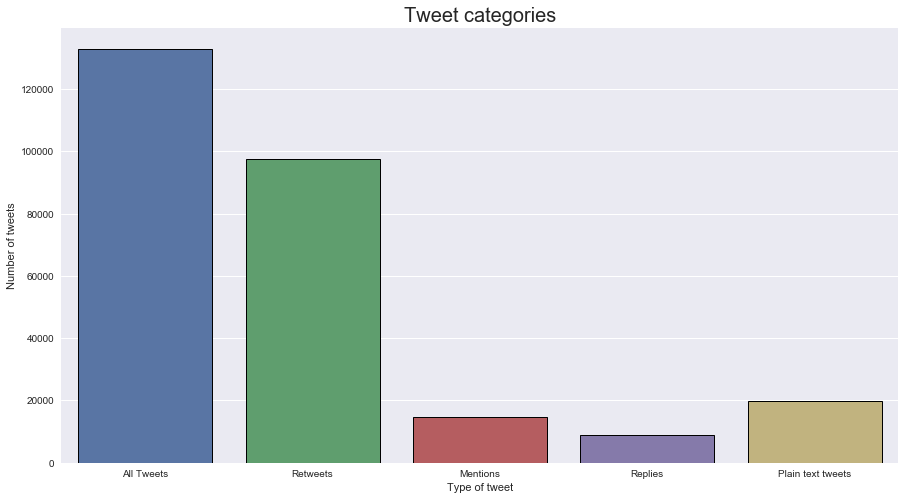

In [21]:
#Now we will plot all the different categories. Note that the reply tweets are inside the mention tweets
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [22]:
#Going to see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))

In [23]:
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [24]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]

In [25]:
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

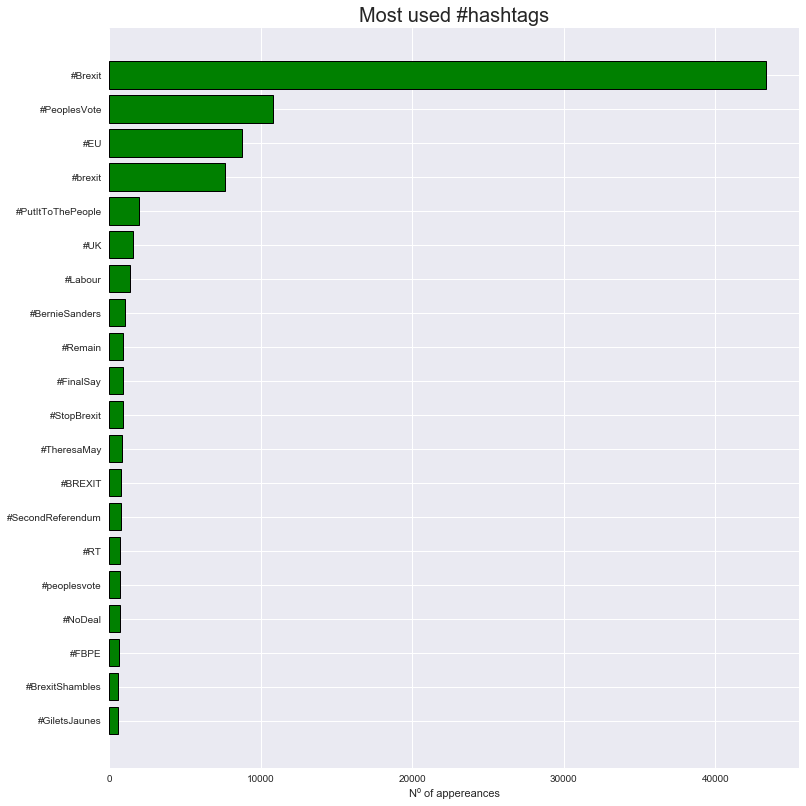

In [26]:
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)

plt.show()

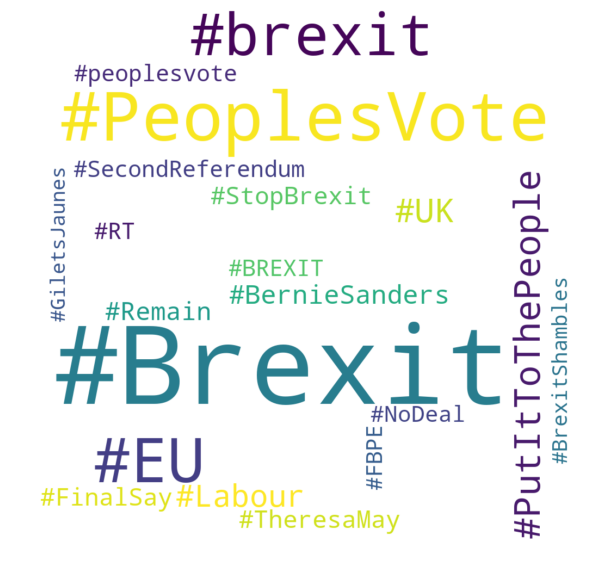

In [27]:
#Make a wordcloud plot of the most ued hashtags, for this we need a dictionary 
#where the keys are the words and the values are the number of appereances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [28]:
#Now we will do the same with the mentions:
#Do the same but with the mentions
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(tweets['text'].apply(mention_pattern.findall))

In [29]:
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [30]:
#Create an ordered list of tuples with the most mentioned users and the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]

In [31]:
#Pick the 20 top mentioned users to plot and separate the previous list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

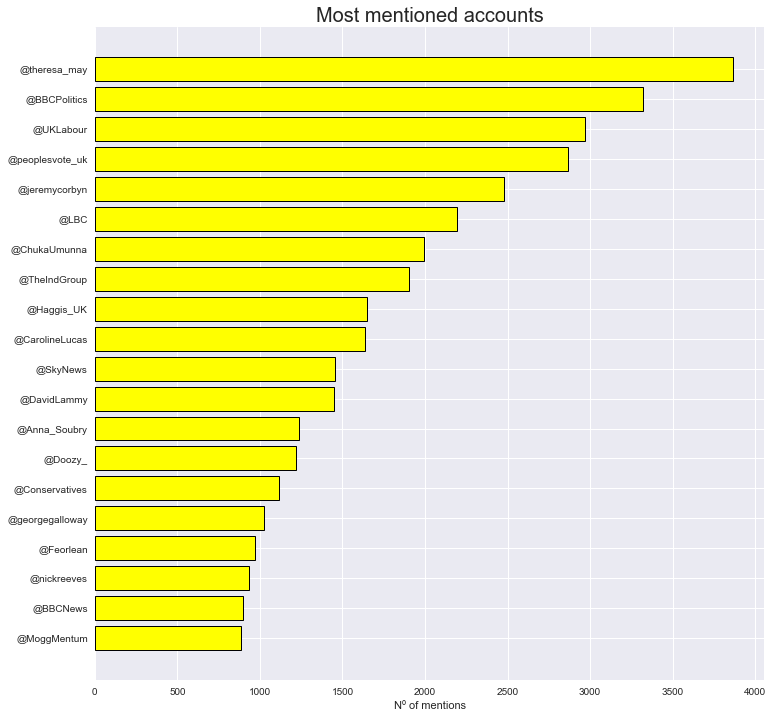

In [32]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

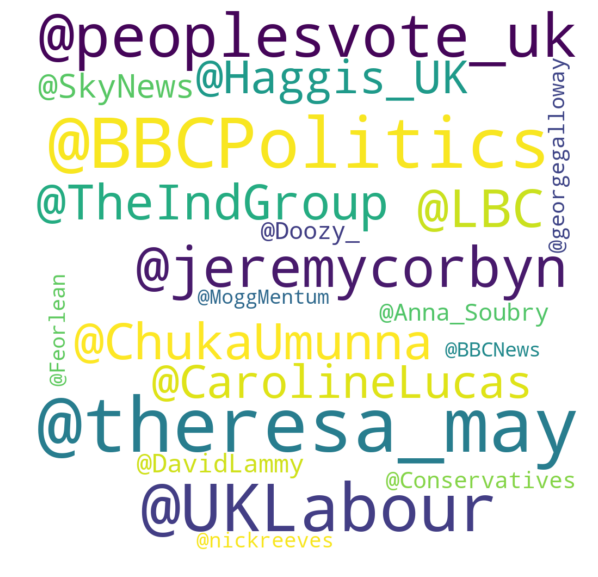

In [33]:
#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [34]:
#Lets take a look at the users who are posting these tweets now:
print("There are {} different users".format(tweets['Username'].nunique()))

There are 59508 different users


In [35]:
#Going to see who are the users who have tweeted or retweeted the most and see how
#Likely it is that they are bots
usertweets = tweets.groupby('Username')

In [36]:
#Taking the top 25 tweeting users
top_users = usertweets.count()['text'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]

In [37]:
#Now, like in the previous hashtags and mention cases, going to make two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])

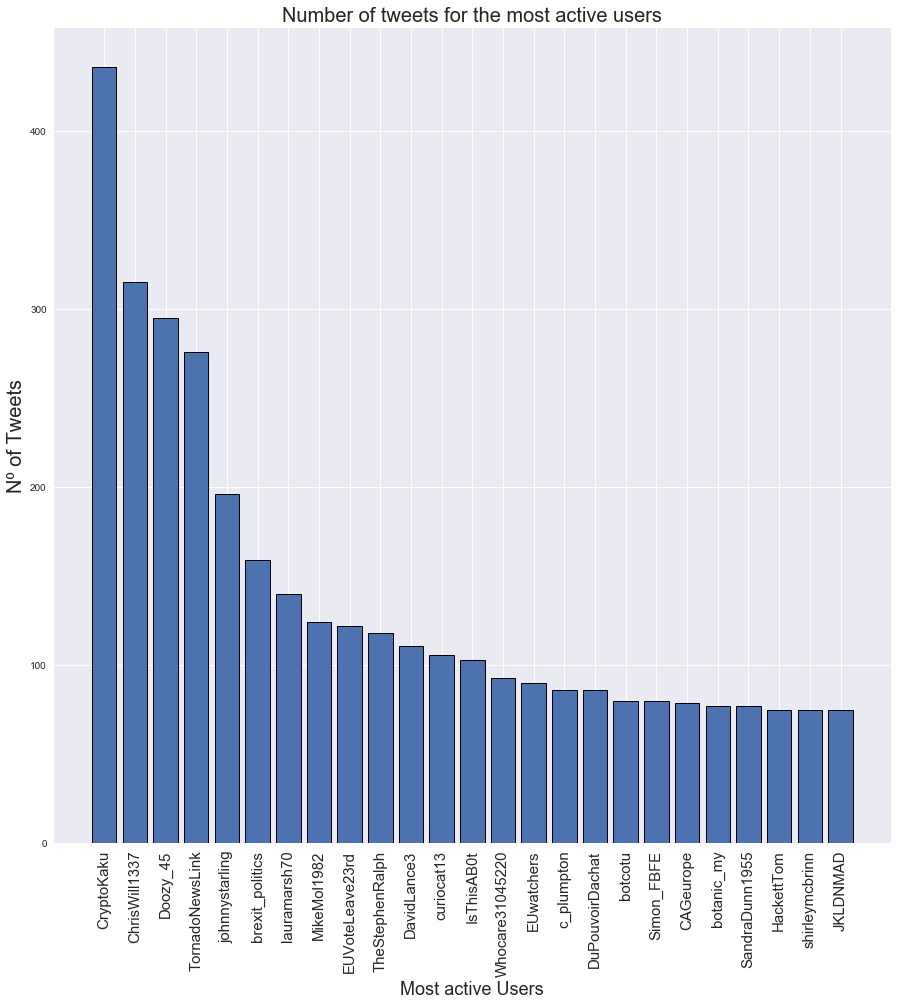

In [38]:
#Plot these results
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)

plt.show()

In [39]:
#Now we will see the probabilities of each of the users being a bot using the BOTOMETER API:
import botometer
import tweepy

In [40]:
#Key from BOTOMETER API
mashape_key = "ENTER YOUR KEY API KEY HERE"

In [41]:
#Dictionary with the credentials for the Twitter APIs
twitter_app_auth = {
    'access_token' : "ENTER ACCESS TOKEN",
    'access_token_secret' : "ENTER ACCESS TOKEN SECRET",
    'consumer_key' : "ENTER CONSUMER KEY",
    'consumer_secret' : "ENTER CONSUMER SECRET",    
}

In [42]:
bom = botometer.Botometer(wait_on_ratelimit = True, mashape_key = mashape_key, **twitter_app_auth)

In [43]:
#Returns a dictionary with the most active users and the porcentage of likeliness of them bein a Bot using BOTOMETER
bot_dict = {}
top_users_list = dict_keys
for user in top_users_list:
    user = '@'+ user
    try:
        result = bom.check_account(user)
        bot_dict[user] = int((result['scores']['english'])*100)
    except tweepy.TweepError:
        bot_dict[user] = 'None'
        continue

In [44]:
bot_dict

{'@CryptoKaku': 25,
 '@ChrisWill1337': 'None',
 '@Doozy_45': 44,
 '@TornadoNewsLink': 59,
 '@johnnystarling': 15,
 '@brexit_politics': 42,
 '@lauramarsh70': 32,
 '@MikeMol1982': 22,
 '@EUVoteLeave23rd': 66,
 '@TheStephenRalph': 11,
 '@DavidLance3': 40,
 '@curiocat13': 6,
 '@IsThisAB0t': 68,
 '@Whocare31045220': 'None',
 '@EUwatchers': 34,
 '@c_plumpton': 15,
 '@DuPouvoirDachat': 40,
 '@botcotu': 5,
 '@Simon_FBFE': 42,
 '@CAGeurope': 82,
 '@botanic_my': 50,
 '@SandraDunn1955': 36,
 '@HackettTom': 44,
 '@shirleymcbrinn': 13,
 '@JKLDNMAD': 20}

In [46]:
#Now we will make a timeseries of the tweet production

In [38]:
tweets['Timestamp'] = pd.to_datetime(tweets['Timestamp'], infer_datetime_format = "%d/%m/%Y", utc  = False)

In [39]:
def giveday(timestamp):
    day_string = timestamp.day
    return day_string

In [40]:
tweets['day'] = tweets['Timestamp'].apply(giveday)
days = tweets.groupby('day')
daycount = days['text'].count()
timedict = daycount.to_dict()

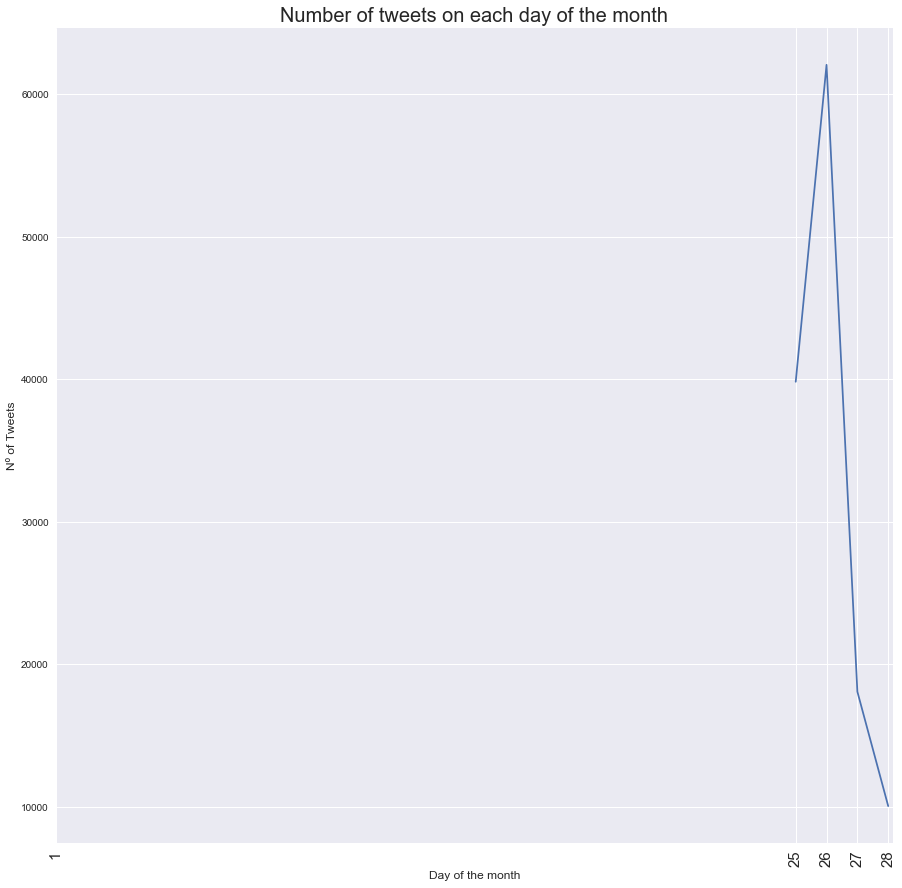

In [44]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict.keys()), list(timedict.values()))
plt.xlabel('Day of the month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of the month', fontsize = 20)
plt.savefig('Brexit_time_series.jpg')
plt.show()

In [53]:
tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply,day
0,RT @rocciabella: First stockpile in.\n#peoplesvote #FBPE #Brexit https://t.co/lsJEe5YJNN,Union_Jacky,2019-02-25 11:44:48,87,None,iPhone,True,None,25
1,RT @Dentons: Our #UK #RealEstate team discusses a recent High Court decision in Canary Wharf Limited v. European Medicines Agency confirmin…,MKRealEstLaw,2019-02-25 11:44:48,140,London,Web,True,None,25
2,RT @SimonOak3: @owenhalliday123 @JohnHopkins_ Outraged if this criminal madness would not be stopped right now.\n\n#Brexit is a crime.\n\n#Stop…,preshn9,2019-02-25 11:44:53,140,None,Android,True,None,25
3,RT @johnmcdonnellMP: This report by Class confirms forensically what so many are reporting is the reality on the ground in their communitie…,MomentumCV,2019-02-25 11:44:54,140,"Council Estate, HD2, Kirklees,",Android,True,None,25
4,RT @M_AndersonSF: Cllr. Patricia Logue and I are just out of a brilliant meeting with the residents in Alexander house.\nDiscussion on #Brex…,half98,2019-02-25 11:44:55,140,Belfast,Android,True,None,25


In [54]:
#Now lets explore the different devices where the tweets are produced from and plot these results

In [55]:
devices = tweets.groupby('device')
devicecount = devices['text'].count()

In [56]:
#Same procedure as the for the mentions, hashtags, etc..
device_dict = devicecount.to_dict()
device_ordered_list =sorted(device_dict.items(), key=lambda x:x[1])
device_ordered_list = device_ordered_list[::-1]

In [57]:
device_dict_values = []
device_dict_keys = []
for item in device_ordered_list:
    device_dict_keys.append(item[0])
    device_dict_values.append(item[1])

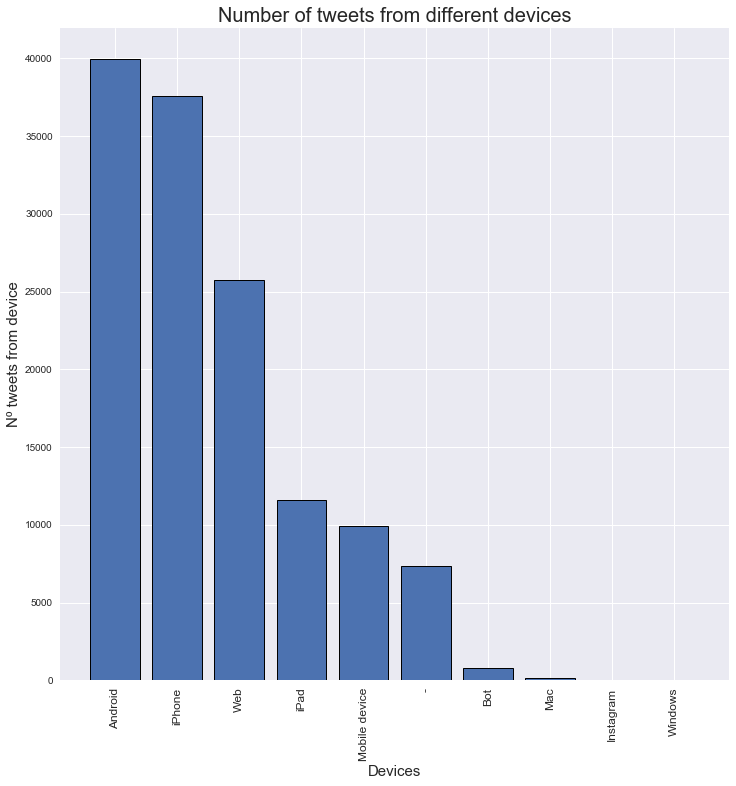

In [58]:
fig = plt.figure(figsize = (12,12))
index = np.arange(len(device_dict_keys))
plt.bar(index, device_dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Devices', fontsize = 15)
plt.ylabel('Nº tweets from device', fontsize=15)
plt.xticks(index, list(device_dict_keys), fontsize=12, rotation=90)
plt.title('Number of tweets from different devices', fontsize = 20)
plt.savefig('Device_Tweets.jpg')
plt.show()

In [59]:
#Lets see other useful information that can be gathered:
print("The mean lenght of the tweets is:", np.mean(tweets['lenght']))

The mean lenght of the tweets is: 145.01233556340674


In [60]:
#See how many tweets have URLs
url_tweets = tweets[tweets['text'].str.contains("http")]
print(f"The percentage of tweets with Urls is {round(len(url_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of tweets with Urls is 23% of all the tweets


In [61]:
#Mean number of tweets per user
print("Number of tweets per user:", len(tweets)/tweets['Username'].nunique())

Number of tweets per user: 2.2354977482019223


In [62]:
print("Number of different users:", tweets['Username'].nunique())

Number of different users: 59508


Thanks for coding along! See you soon! 